In [6]:
import numpy as np
import jax.numpy as jnp
from jax import jit
from adoptODE import simple_simulation, train_adoptODE
import matplotlib.pyplot as plt

def define_system(**kwargs_sys):
    x_max = kwargs_sys['x_max']
    z_max = kwargs_sys['z_max']
    d_max = kwargs_sys['d_max']
    f_max = kwargs_sys['f_max']
    d_0 = kwargs_sys['d_0']
    f_0 = kwargs_sys['f_0']
    A = kwargs_sys['A']
    
    def gen_y0():
        x0 = -x_max + 2 * np.random.rand()*x_max
        z0 = -z_max + 2 * np.random.rand()*z_max
        return {'x':x0, 'z':z0}
    
    def gen_params():
        d = d_0 + np.random.rand()*d_max
        f = f_0 + np.random.rand()*f_max
        
        return {'d':d, 'f':f}, {}, {}
        
    @jit
    def eom(y, t, params, iparams, exparams):
        dx = y['z']
        dz = - params['d'] * y['z'] + jnp.exp(-y["x"]) -1  + A * jnp.sin(2*jnp.pi * params['f'] * t)
        return {'x':dx, 'z':dz}

    @jit
    def loss(ys, params, iparams, 
                    exparams, targets):
        x = ys['x']
        z = ys['z']
        t_x = targets['x']
        t_z = targets['z']
        return jnp.mean((x-t_x)**2 + (z-t_z)**2)

    return eom, loss, gen_params, gen_y0, {}

In [7]:
kwargs_sys = {'x_max': 5,
            'z_max': 5,
            'd_max': 1,
            'f_max': 5,
            'd_0': .01,
            'f_0': 1,
            'A' : 2,
            'N_sys': 1}
kwargs_adoptODE = {'lr':3e-2, 'epochs':2000}
t_evals = np.linspace(0,100,1000)
dataset = simple_simulation(define_system,
                                t_evals,
                                kwargs_sys,
                                kwargs_adoptODE)

In [8]:
print('The true parameters used to generate the data: ', dataset.params)
print('The initial gues of parameters for the recovery: ', dataset.params_train )

The true parameters used to generate the data:  {'d': 0.10659155720874024, 'f': 5.988694018624357}
The initial gues of parameters for the recovery:  {'d': 0.8473540588888934, 'f': 3.2630798007617035}


In [9]:
_ = train_adoptODE(dataset)
print('True params: ', dataset.params)
print('Found params: ', dataset.params_train)

Epoch 000:  Loss: 3.7e+00,  Params Err.: 2.8e+00, y0 error: 0.0e+00, Params Norm: 3.4e+00, iParams Err.: 0.0e+00, iParams Norm: 0.0e+00, 
Epoch 200:  Loss: 7.1e-03,  Params Err.: 2.2e+00, y0 error: 0.0e+00, Params Norm: 3.8e+00, iParams Err.: 0.0e+00, iParams Norm: 0.0e+00, 
Epoch 400:  Loss: 2.2e-02,  Params Err.: 2.3e+00, y0 error: 0.0e+00, Params Norm: 3.7e+00, iParams Err.: 0.0e+00, iParams Norm: 0.0e+00, 
Epoch 600:  Loss: 1.8e-02,  Params Err.: 2.3e+00, y0 error: 0.0e+00, Params Norm: 3.7e+00, iParams Err.: 0.0e+00, iParams Norm: 0.0e+00, 
Epoch 800:  Loss: 9.9e-03,  Params Err.: 2.4e+00, y0 error: 0.0e+00, Params Norm: 3.6e+00, iParams Err.: 0.0e+00, iParams Norm: 0.0e+00, 
Epoch 1000:  Loss: 2.0e-02,  Params Err.: 2.3e+00, y0 error: 0.0e+00, Params Norm: 3.7e+00, iParams Err.: 0.0e+00, iParams Norm: 0.0e+00, 
Epoch 1200:  Loss: 6.0e-03,  Params Err.: 2.1e+00, y0 error: 0.0e+00, Params Norm: 3.9e+00, iParams Err.: 0.0e+00, iParams Norm: 0.0e+00, 
Epoch 1400:  Loss: 1.8e-02,  Par

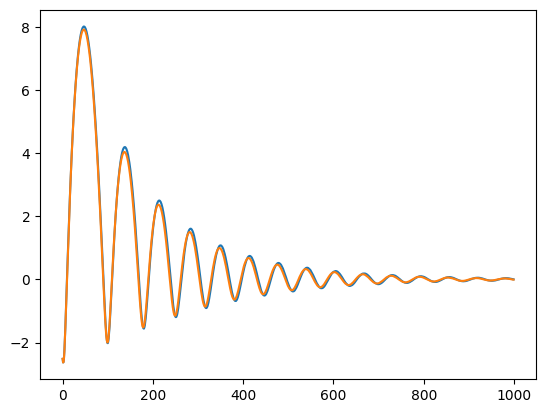